In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = "whitegrid")
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("datasets/ML/knn.csv")
data.head()

,age,salary,level
0,30,250000,Level A
1,20,400000,Level A
2,35,300000,Level A
3,24,270000,Level A
4,26,380000,Level A


### Normalizing the data

In [3]:
from sklearn.preprocessing import MinMaxScaler
data.iloc[:,:2] = MinMaxScaler().fit_transform(data.iloc[:,:2])
data.head()

,age,salary,level
0,0.303030,0.000000,Level A
1,0.000000,0.681818,Level A
2,0.454545,0.227273,Level A
3,0.121212,0.090909,Level A
4,0.181818,0.590909,Level A


### Building SVM model

In [4]:
from sklearn.svm import SVC
model = SVC(C = 10, kernel = "linear")
model.fit(data.iloc[:,:2], data.iloc[:,2])

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Estimating the values

In [5]:
est = model.predict(data.iloc[:,:2])
est

array(['Level A', 'Level A', 'Level A', 'Level A', 'Level A', 'Level A',
       'Level B', 'Level B', 'Level B', 'Level B', 'Level B', 'Level B',
       'Level B', 'Level B', 'Level A'], dtype=object)

### Confusion Matrix

In [6]:
from sklearn import metrics
actual = data.iloc[:,2].values.reshape(-1,1)
cm = metrics.confusion_matrix(actual, est, labels=pd.unique(data.iloc[:,2]))
cm

array([[7, 0],
       [0, 8]])

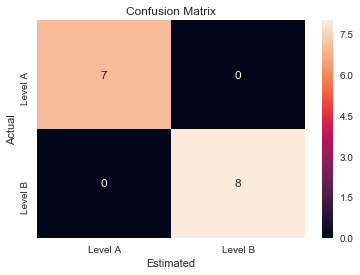

In [9]:
sns.heatmap(cm, annot=True)

# labels, title and ticks
ax = plt.subplot()
ax.set_title('Confusion Matrix'); 
ax.set_xlabel('Estimated');     ax.set_ylabel('Actual'); 
ax.xaxis.set_ticklabels(pd.unique(data.iloc[:,2])); ax.yaxis.set_ticklabels(pd.unique(data.iloc[:,2]));

### Accuracy of the model

In [10]:
model.score(data.iloc[:,:2], data.iloc[:,2]) * 100

100.0

### Support Vectors

In [11]:
print("Number of Support Vectors: ", len(model.support_))
model.support_vectors_

Number of Support Vectors:  5


array([[0.45454545, 0.22727273],
       [0.18181818, 0.59090909],
       [0.39393939, 1.        ],
       [0.57575758, 0.50002273],
       [0.66666667, 0.33181818]])

### Visualizing the model

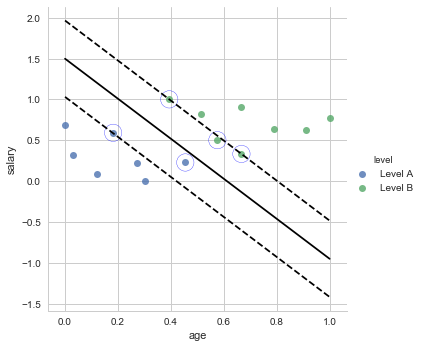

In [12]:
def svm_plot(mod):
    temp = pd.DataFrame([data.iloc[:,0], data.iloc[:,1], data.iloc[:,2]]).T
    sns.lmplot("age", "salary", data = temp, hue='level', fit_reg=False)
    plt.scatter(mod.support_vectors_[:, 0],
                       mod.support_vectors_[:, 1],s=300, facecolors='none', edgecolors='b')
    w = mod.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(np.min(data.iloc[:,0]), np.max(data.iloc[:,0]))
    yy = a * xx - (mod.intercept_[0]) / w[1]

    margin = 1 / np.sqrt(np.sum(mod.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    plt.plot(xx,yy,c="k")                      # Optimum Hyperplane
    plt.plot(xx,yy_down,"k--")                 # Lower margin
    plt.plot(xx,yy_up,"k--")                   # Upper margin
svm_plot(model)

### Slack variable

In [13]:
model.epsilon

0.0

## Regularization parameter C
$C\propto \frac{1}{Margin Length}$

### With smaller value of C (0.5), we obtain larger Margin length and hence more Support Vectors

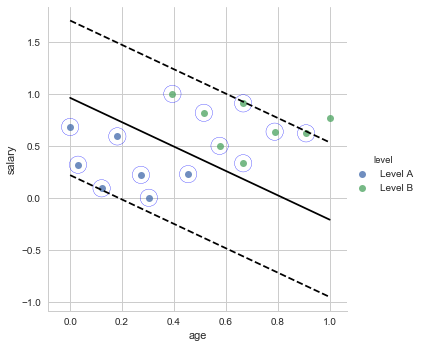

In [14]:
model_C001 = SVC(C = 0.5, kernel = 'linear')
model_C001.fit(data.iloc[:,:2], data.iloc[:,2])
svm_plot(model_C001)

### With larger value of C (1000), we obtain smaller Margin length and hence less Support Vectors

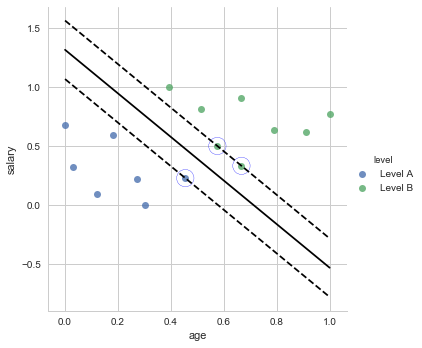

In [15]:
model_C001 = SVC(C = 1000, kernel = 'linear')
model_C001.fit(data.iloc[:,:2], data.iloc[:,2])
svm_plot(model_C001)

### Finding best value of C using Cross-Validation

In [16]:
from sklearn.model_selection import cross_val_score
cv_scores = []
for c in [0.01, 0.5, 1, 5, 10, 50, 100, 500, 1000]:
    model_cv = SVC(C = c, kernel = 'linear')
    model_cv.fit(data.iloc[:,:2], data.iloc[:,2])
    scores = cross_val_score(model_cv, data.iloc[:,:2], data.iloc[:,2], cv=3, scoring='accuracy')
    cv_scores.append(scores.mean()*100)

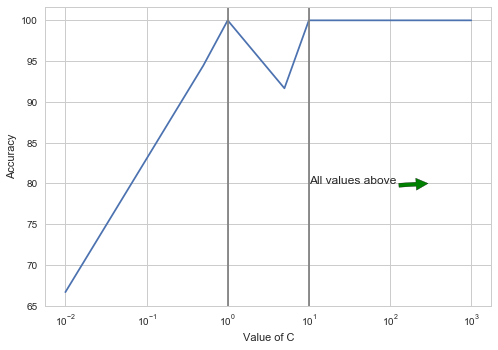

In [17]:
plt.plot([0.01, 0.5, 1, 5, 10, 50, 100, 500, 1000],cv_scores)
plt.xscale("log")
plt.xlabel("Value of C")
plt.ylabel("Accuracy")
plt.axvline(1, color='.5')
plt.axvline(10, color='.5')
plt.annotate('All values above', xy=(300, 80), 
            xytext=(10,80),
            arrowprops=dict(facecolor='green', 
                           shrink=0.02),)

### Hyperparameter Gamma 

In [18]:
model.gamma     # auto = 1/n_features. Here, features = 2. Hence, gamma = 0.5

'auto'

In [19]:
m = SVC(gamma = 1, C = 10, kernel = "linear")
from sklearn.model_selection import cross_val_score
cv_scores = []
for g in [0.01, 0.5, 1, 5, 10, 50, 100, 500, 1000]:
    model_cv = SVC(gamma = g, C = 10, kernel = "linear")
    model_cv.fit(data.iloc[:,:2], data.iloc[:,2])
    scores = cross_val_score(model_cv, data.iloc[:,:2], data.iloc[:,2], cv=3, scoring='accuracy')
    cv_scores.append(scores.mean()*100)

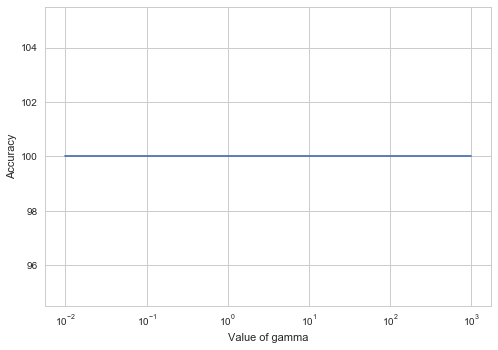

In [20]:
plt.plot([0.01, 0.5, 1, 5, 10, 50, 100, 500, 1000],cv_scores)
plt.xscale("log")
plt.xlabel("Value of gamma")
plt.ylabel("Accuracy")

# Non-linear kernel

In [21]:
data = pd.read_csv("datasets/ML/svm.csv")
data.head()

,X1,X2,y
0,1.0,2.4,Category A
1,1.2,2.8,Category A
2,1.5,1.6,Category A
3,2.0,3.2,Category A
4,2.5,2.0,Category A


### Visualization

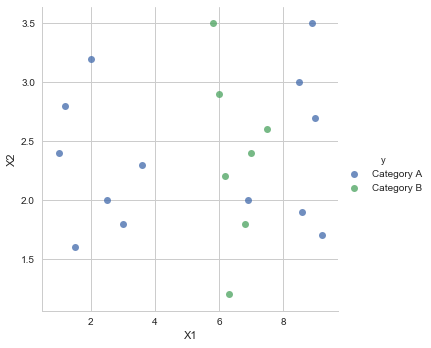

In [22]:
temp = pd.DataFrame([data.iloc[:,0], data.iloc[:,1], data.iloc[:,2]]).T
sns.lmplot("X1", "X2", data = temp, hue='y', fit_reg=False)

### Building non-linear SVM model

In [23]:
model = SVC(kernel = "rbf", C=500) # Radial Basis Function (Gaussian kernel)
model.fit(data.iloc[:,:2], data.iloc[:,2])

SVC(C=500, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Visualization

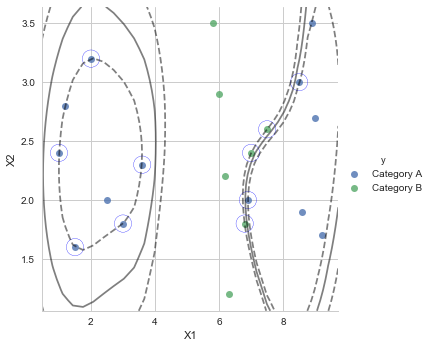

In [24]:
def plot_svc_df(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1,0,1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
sns.lmplot("X1", "X2", data = temp, hue='y', fit_reg=False)
plot_svc_df(model)
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],facecolors='none', edgecolors='b', s=300)

### Estimating values

In [25]:
est = model.predict(data.iloc[:,:2])
est

array(['Category A', 'Category A', 'Category A', 'Category A',
       'Category A', 'Category A', 'Category A', 'Category B',
       'Category B', 'Category B', 'Category B', 'Category B',
       'Category B', 'Category B', 'Category A', 'Category A',
       'Category A', 'Category A', 'Category A', 'Category A'],
      dtype=object)

In [26]:
from sklearn import metrics
actual = data.iloc[:,2].values.reshape(-1,1)
cm = metrics.confusion_matrix(actual, est, labels=pd.unique(data.iloc[:,2]))
cm

array([[13,  0],
       [ 0,  7]])

### Accuracy

In [27]:
model.score(data.iloc[:,:2], data.iloc[:,2]) * 100

100.0

# Multiple class classification

In [28]:
from sklearn import datasets
iris = datasets.load_iris()
iris.target_names
data = pd.DataFrame(iris.data,columns = iris.feature_names )
data["Species"] = iris.target

# replacing number in Species by their name
# for i in range(len(data.iloc[:,0])):
#     if data.iloc[i,4] == 0:
#         data.iloc[i,4] = iris.target_names[0]
#     elif data.iloc[i,4] == 1:
#          data.iloc[i,4] = iris.target_names[1]
#     else:
#         data.iloc[i,4] = iris.target_names[2]

print(np.unique(data.iloc[:,4]))
data.head()

[0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Visualization

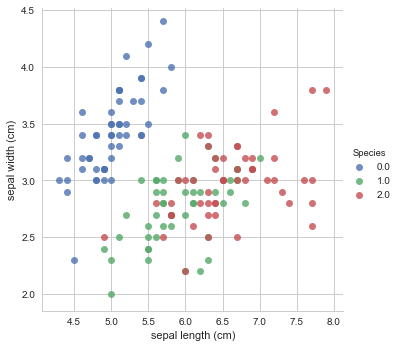

In [29]:
temp = pd.DataFrame([data.iloc[:,0], data.iloc[:,1], data.iloc[:,4]]).T
sns.lmplot("sepal length (cm)", "sepal width (cm)", data = temp, hue='Species', fit_reg=False)

### building SVM model

In [30]:
model = SVC(C=500)
model.fit(data.iloc[:,:2], data.iloc[:,4])

SVC(C=500, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z)
    return out

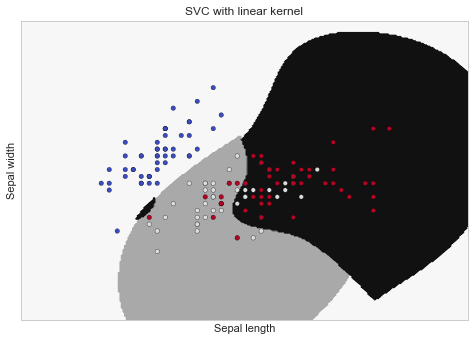

In [32]:
fig, ax = plt.subplots()

xx, yy = make_meshgrid(data.iloc[:,0], data.iloc[:,1])

# for clf, title, ax in zip(models, titles, sub.flatten()):
plot_contours(ax, model, xx, yy)
ax.scatter(data.iloc[:,0], data.iloc[:,1], c=iris.target, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("SVC with linear kernel")